# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import seaborn as sns
import numpy as np 
import re
import os
from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi
from datetime import datetime, timedelta

# Visualization Style

In [2]:
formatter = ticker.StrMethodFormatter('Rp.{x:,.0f}')

sns.set_theme(style='darkgrid')
sns.set_palette("deep")
mpl.rcParams['font.family'] = 'sans'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

# Data Collecting

- Import system path

In [3]:
import sys
sys.path.append('..')

- Import module

In [4]:
from scripts import get_data_from_mongo

- Get Data from MongoDB

In [5]:
df_import = get_data_from_mongo.get_data_mongo('tanah_bali_raw')
df_import = pd.DataFrame(df_import)

----------------------------------------------
Connected to db db_tanah_bali
Total documents get: 26838
Dissconnected!


In [6]:
df = df_import.copy()
df.head()

,_id,title,date,price,address,land_area,timestamp
0,6649e16d9c170999ee69ca70,Tanah Plot Kecil Link Villa dan Guesthouse Kam...,Diperbarui 1 jam yang lalu oleh,Rp 4 Juta /m²,"Nusa Dua, Badung",200 m²,2024-05-19 16:25:20
1,6649e16d9c170999ee69ca78,Beautiful Land,Diperbarui 2 bulan yang lalu oleh,Rp 7 Juta /m²,"Canggu, Badung",400 m²,2024-05-19 16:25:21
2,6649e16d9c170999ee69ca7b,TANAH ZONA KUNING JALAN LEBAR LINGKUNGAN VILLA...,Diperbarui 3 minggu yang lalu oleh,Rp 10 Juta /m²,"Canggu, Badung",300 m²,2024-05-19 16:25:21
3,6649e16d9c170999ee69ca7e,Tanah Jual Lokasi Kuta,Diperbarui 3 jam yang lalu oleh,"Rp 94,5 Miliar Total","Kuta, Badung",6300 m²,2024-05-19 16:25:21
4,6649e16d9c170999ee69ca81,YOP YOI DI JUAL TANAH LOKASI KELATING KERAMBIT...,Diperbarui 3 jam yang lalu oleh,"Rp 7,9 Miliar Total","Kelating, Tabanan",2000 m²,2024-05-19 16:25:21


# Data Understanding

### Check Dataframe Dimension

In [7]:
df.shape

(26838, 7)

In [8]:
df.columns

Index(['_id', 'title', 'date', 'price', 'address', 'land_area', 'timestamp'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26838 entries, 0 to 26837
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   _id        26838 non-null  object        
 1   title      26838 non-null  object        
 2   date       26838 non-null  object        
 3   price      26838 non-null  object        
 4   address    26838 non-null  object        
 5   land_area  26838 non-null  object        
 6   timestamp  26838 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 1.4+ MB


# Data Preprocessing

### Handling Missing Value

In [10]:
df.isna().sum().to_frame().T

,_id,title,date,price,address,land_area,timestamp
0,0,0,0,0,0,0,0


### Handling Duplicate Data

- Drop _id Column

In [11]:
df = df.drop(columns='_id', axis=1)
df.head()

,title,date,price,address,land_area,timestamp
0,Tanah Plot Kecil Link Villa dan Guesthouse Kam...,Diperbarui 1 jam yang lalu oleh,Rp 4 Juta /m²,"Nusa Dua, Badung",200 m²,2024-05-19 16:25:20
1,Beautiful Land,Diperbarui 2 bulan yang lalu oleh,Rp 7 Juta /m²,"Canggu, Badung",400 m²,2024-05-19 16:25:21
2,TANAH ZONA KUNING JALAN LEBAR LINGKUNGAN VILLA...,Diperbarui 3 minggu yang lalu oleh,Rp 10 Juta /m²,"Canggu, Badung",300 m²,2024-05-19 16:25:21
3,Tanah Jual Lokasi Kuta,Diperbarui 3 jam yang lalu oleh,"Rp 94,5 Miliar Total","Kuta, Badung",6300 m²,2024-05-19 16:25:21
4,YOP YOI DI JUAL TANAH LOKASI KELATING KERAMBIT...,Diperbarui 3 jam yang lalu oleh,"Rp 7,9 Miliar Total","Kelating, Tabanan",2000 m²,2024-05-19 16:25:21


- Check Duplicate Data

In [12]:
dup_data = df.duplicated().sum()
print(f'Jumlah data duplicate: {dup_data}')
print(f'Dari total {df.shape[0]} data')

Jumlah data duplicate: 321
Dari total 26838 data


In [13]:
df[df.duplicated()]

,title,date,price,address,land_area,timestamp
129,LAST 8 UNITS !! Ultimate Cliff Front Land & Fo...,Diperbarui 1 hari yang lalu oleh,"Rp 3,5 Juta /m²","Seraya, Karangasem",700 m²,2024-05-19 16:27:19
528,"LAHAN BUC DENGAN VIEW MENAWAN DI TEGALLALANG, ...",Diperbarui 1 hari yang lalu oleh,"Rp 7,75 Miliar Total","Tegallalang, Gianyar",3100 m²,2024-05-19 16:27:04
544,TANAH BONUS BANGUNAN DI JL UTAMA DEWI MADRI CO...,Diperbarui 7 jam yang lalu oleh,Rp 9 Miliar Total,"Denpasar Selatan, Denpasar",577 m²,2024-05-19 16:25:51
650,TANAH MURAH COCOK BUAT BANGUN RUMAH VILLA,Diperbarui 1 hari yang lalu oleh,Rp 405 Juta Total,"Sukawati, Gianyar",141 m²,2024-05-19 16:27:02
753,Tanah Kavling Murah daerah Banyuning Singaraja,Diperbarui 2 hari yang lalu oleh,Rp 250 Juta Total,"Banyuning, Buleleng",125 m²,2024-05-19 16:28:12
...,...,...,...,...,...,...
23379,"Tanah 3,45 Are Area Seminyak, Bali",Diperbarui 3 bulan yang lalu oleh,"Rp 3,1 Miliar Total","Seminyak, Badung",345 m²,2024-05-19 18:59:22
23857,"Kavling Ocean View Cocok Untuk Vila di Pecatu,...",Diperbarui 3 bulan yang lalu oleh,"Rp 61,6 Miliar Total","Pecatu, Badung",15500 m²,2024-05-19 19:02:18
24558,"For Sale Land 4,55 Are At Suluban, Pecatu, Bali",Diperbarui 2 bulan yang lalu oleh,Rp 6 Juta /m²,"Pecatu, Badung",455 m²,2024-05-19 19:07:33
24585,Tanah 20 Are Unblocked View di Temu Dewi Pecat...,Diperbarui 2 bulan yang lalu oleh,"Rp 4,5 Juta /m²","Pecatu, Badung",2000 m²,2024-05-19 19:07:40


- Remove Duplicate Data

In [14]:
df.drop_duplicates(keep='first', inplace=True)

dup_data = df.duplicated().sum()
print(f'Jumlah data duplicate: {dup_data}')
print(f'Dari total {df.shape[0]} data')

Jumlah data duplicate: 0
Dari total 26517 data


- Remove Unnessecary Data

In [15]:
df = df.drop(columns='title', axis=1)
df.columns

Index(['date', 'price', 'address', 'land_area', 'timestamp'], dtype='object')

### Cleaning Date Column

- Check Date Column

In [16]:
df['date'].head().to_frame()

,date
0,Diperbarui 1 jam yang lalu oleh
1,Diperbarui 2 bulan yang lalu oleh
2,Diperbarui 3 minggu yang lalu oleh
3,Diperbarui 3 jam yang lalu oleh
4,Diperbarui 3 jam yang lalu oleh


- Convert String to Datetime Data Type

In [17]:
import locale
locale.setlocale(locale.LC_TIME, 'id_ID.UTF-8')

def convert_relative_data(description, timestamp):
    match = re.search(r'(\d+) (menit|jam|hari|minggu|bulan)', description)
    if not match:
        return None
    
    value = int(match.group(1))
    unit = match.group(2)
    
    if unit == 'menit':
        delta = timedelta(minutes=value)
    elif unit == 'jam':
        delta = timedelta(hours=value)
    elif unit == 'hari':
        delta = timedelta(days=value)
    elif unit == 'minggu':
        delta = timedelta(weeks=value)
    elif unit == 'bulan':
        delta = timedelta(days=30 * value)
    else:
        delta = timedelta()
    
    date = timestamp - delta
    return date

def convert_absolute_date(text):
    date_pattern = r'\b\d{2}\s\w+\s\d{4}\b'
    match = re.search(date_pattern, text)
    if match:
        return datetime.strptime(match.group(0), '%d %B %Y')
    return None

def convert_to_timestamp(row):
    description = row['date']
    timestamp = row['timestamp']
    
    if 'yang lalu' in description:
        return convert_relative_data(description, timestamp)
    else:
        return convert_absolute_date(description)

In [18]:
df['converted_date'] = df.apply(convert_to_timestamp, axis=1).dt.strftime('%Y-%m-%d')

df_cleaned_date = df.copy()
df_cleaned_date.head()

,date,price,address,land_area,timestamp,converted_date
0,Diperbarui 1 jam yang lalu oleh,Rp 4 Juta /m²,"Nusa Dua, Badung",200 m²,2024-05-19 16:25:20,2024-05-19
1,Diperbarui 2 bulan yang lalu oleh,Rp 7 Juta /m²,"Canggu, Badung",400 m²,2024-05-19 16:25:21,2024-03-20
2,Diperbarui 3 minggu yang lalu oleh,Rp 10 Juta /m²,"Canggu, Badung",300 m²,2024-05-19 16:25:21,2024-04-28
3,Diperbarui 3 jam yang lalu oleh,"Rp 94,5 Miliar Total","Kuta, Badung",6300 m²,2024-05-19 16:25:21,2024-05-19
4,Diperbarui 3 jam yang lalu oleh,"Rp 7,9 Miliar Total","Kelating, Tabanan",2000 m²,2024-05-19 16:25:21,2024-05-19


In [19]:
df_cleaned_date.sort_values(by='converted_date', ascending=True)

,date,price,address,land_area,timestamp,converted_date
23773,Diperbarui 11 Desember 2022 oleh,Rp 7 Juta /m²,"Sanur Kauh, Denpasar",500 m²,2024-05-19 19:02:09,2022-12-11
23730,Diperbarui 15 Desember 2022 oleh,"Rp 5,5 Miliar Total","Kediri, Tabanan",2200 m²,2024-05-19 19:01:45,2022-12-15
23728,Diperbarui 16 Desember 2022 oleh,"Rp 8,12 Miliar Total","Canggu, Badung",956 m²,2024-05-19 19:01:45,2022-12-16
23697,Diperbarui 22 Desember 2022 oleh,Rp 11 Juta /m²,"Kediri, Tabanan",105 m²,2024-05-19 19:01:28,2022-12-22
23629,Diperbarui 27 Desember 2022 oleh,"Rp 3,25 Juta /m²","Candi Dasa, Karangasem",2510 m²,2024-05-19 19:01:21,2022-12-27
...,...,...,...,...,...,...
620,Diperbarui 11 jam yang lalu oleh,"Rp 4,5 Miliar Total","Kerambitan, Tabanan",1500 m²,2024-05-19 16:26:14,2024-05-19
618,Diperbarui 11 jam yang lalu oleh,"Rp 29,9 Miliar Total","Ubud, Gianyar",16649 m²,2024-05-19 16:26:14,2024-05-19
13694,Diperbarui 3 jam yang lalu oleh,Rp 6 Juta /m²,"Cemagi, Badung",170 m²,2024-05-19 17:55:17,2024-05-19
613,Diperbarui 10 jam yang lalu oleh,"Rp 2,27 Miliar Total","Kerambitan, Tabanan",700 m²,2024-05-19 16:26:06,2024-05-19


- Backup Dataframe

In [20]:
df = df_cleaned_date.copy()
df.head()

,date,price,address,land_area,timestamp,converted_date
0,Diperbarui 1 jam yang lalu oleh,Rp 4 Juta /m²,"Nusa Dua, Badung",200 m²,2024-05-19 16:25:20,2024-05-19
1,Diperbarui 2 bulan yang lalu oleh,Rp 7 Juta /m²,"Canggu, Badung",400 m²,2024-05-19 16:25:21,2024-03-20
2,Diperbarui 3 minggu yang lalu oleh,Rp 10 Juta /m²,"Canggu, Badung",300 m²,2024-05-19 16:25:21,2024-04-28
3,Diperbarui 3 jam yang lalu oleh,"Rp 94,5 Miliar Total","Kuta, Badung",6300 m²,2024-05-19 16:25:21,2024-05-19
4,Diperbarui 3 jam yang lalu oleh,"Rp 7,9 Miliar Total","Kelating, Tabanan",2000 m²,2024-05-19 16:25:21,2024-05-19


- Detele Converted_Date and Timestamp Columns 

In [21]:
df['date'] = df['converted_date']
df =df.drop(columns=['timestamp', 'converted_date'])

df.head()

,date,price,address,land_area
0,2024-05-19,Rp 4 Juta /m²,"Nusa Dua, Badung",200 m²
1,2024-03-20,Rp 7 Juta /m²,"Canggu, Badung",400 m²
2,2024-04-28,Rp 10 Juta /m²,"Canggu, Badung",300 m²
3,2024-05-19,"Rp 94,5 Miliar Total","Kuta, Badung",6300 m²
4,2024-05-19,"Rp 7,9 Miliar Total","Kelating, Tabanan",2000 m²


### Cleaning Land Area Column

- Check Land Area Column

In [22]:
df['land_area'].head()

0     200 m²
1     400 m²
2     300 m²
3    6300 m²
4    2000 m²
Name: land_area, dtype: object

- Convert String to Float Datatype

In [23]:
df['numeric_land_area'] = df['land_area'].str.replace(r'm²', '', regex=True).astype(float)

df_cleaned_land_area = df.copy()

df.head()

,date,price,address,land_area,numeric_land_area
0,2024-05-19,Rp 4 Juta /m²,"Nusa Dua, Badung",200 m²,200.0
1,2024-03-20,Rp 7 Juta /m²,"Canggu, Badung",400 m²,400.0
2,2024-04-28,Rp 10 Juta /m²,"Canggu, Badung",300 m²,300.0
3,2024-05-19,"Rp 94,5 Miliar Total","Kuta, Badung",6300 m²,6300.0
4,2024-05-19,"Rp 7,9 Miliar Total","Kelating, Tabanan",2000 m²,2000.0


- Backup Dataframe

In [24]:
df = df_cleaned_land_area.copy()

df.head()

,date,price,address,land_area,numeric_land_area
0,2024-05-19,Rp 4 Juta /m²,"Nusa Dua, Badung",200 m²,200.0
1,2024-03-20,Rp 7 Juta /m²,"Canggu, Badung",400 m²,400.0
2,2024-04-28,Rp 10 Juta /m²,"Canggu, Badung",300 m²,300.0
3,2024-05-19,"Rp 94,5 Miliar Total","Kuta, Badung",6300 m²,6300.0
4,2024-05-19,"Rp 7,9 Miliar Total","Kelating, Tabanan",2000 m²,2000.0


- Delete Numeric_Land_Area Column

In [25]:
df['land_area'] = df['numeric_land_area']
df = df.drop(columns='numeric_land_area', axis=1)

df.head()

,date,price,address,land_area
0,2024-05-19,Rp 4 Juta /m²,"Nusa Dua, Badung",200.0
1,2024-03-20,Rp 7 Juta /m²,"Canggu, Badung",400.0
2,2024-04-28,Rp 10 Juta /m²,"Canggu, Badung",300.0
3,2024-05-19,"Rp 94,5 Miliar Total","Kuta, Badung",6300.0
4,2024-05-19,"Rp 7,9 Miliar Total","Kelating, Tabanan",2000.0


### Cleaning Price Column

- Check Price Column

In [26]:
df['price'].head()

0           Rp 4 Juta /m²
1           Rp 7 Juta /m²
2          Rp 10 Juta /m²
3    Rp 94,5 Miliar Total
4     Rp 7,9 Miliar Total
Name: price, dtype: object

- Check Anomaly Value on Price

In [27]:
dirty_data = df[df['price'].str.contains('Miliar /m²')]
dirty_data

,date,price,address,land_area
89,2024-05-19,"Rp 1,5 Miliar /m²","Canggu, Badung",100.0
295,2024-05-15,"Rp 4,22 Miliar /m²","Kediri, Tabanan",1320.0
691,2024-05-17,"Rp 13,9 Miliar /m²","Denpasar Selatan, Denpasar",1636.0
821,2024-01-20,Rp 85 Miliar /m²,"Kuta Selatan, Badung",9300.0
1080,2024-05-13,Rp 85 Miliar /m²,"Kediri, Tabanan",1750.0
...,...,...,...,...
25545,2024-02-19,"Rp 7,5 Miliar /m²","Canggu, Badung",975.0
25559,2023-12-21,Rp 1 Miliar /m²,"Goa Gong, Badung",1360.0
25625,2024-03-20,Rp 45 Miliar /m²,"Uluwatu, Badung",12300.0
25632,2024-03-20,Rp 2 Miliar /m²,"Seminyak, Badung",2000.0


- Delete Anomaly Value

In [28]:
df = df.drop(dirty_data.index)
df.head()

,date,price,address,land_area
0,2024-05-19,Rp 4 Juta /m²,"Nusa Dua, Badung",200.0
1,2024-03-20,Rp 7 Juta /m²,"Canggu, Badung",400.0
2,2024-04-28,Rp 10 Juta /m²,"Canggu, Badung",300.0
3,2024-05-19,"Rp 94,5 Miliar Total","Kuta, Badung",6300.0
4,2024-05-19,"Rp 7,9 Miliar Total","Kelating, Tabanan",2000.0


In [29]:
dirty_data = df[df['price'].str.contains('Miliar /m²')]
dirty_data.count()

date         0
price        0
address      0
land_area    0
dtype: int64

- Change String to Float Datatype

In [30]:
def parse_price(price_str):
    is_per_square_meter = "/m²" in price_str
    
    numeric_value = re.findall(r'[0-9,]+', price_str)
    
    if not numeric_value:
        return None
    
    numeric_value = float(numeric_value[0].replace(',', '.'))
    
    if "Triliun" in price_str:
        numeric_value *= 1_000_000_000_000
    elif "Miliar" in price_str:
        numeric_value *= 1_000_000_000
    elif "Juta" in price_str:
        numeric_value *= 1_000_000
    elif "Ribu" in price_str:
        numeric_value *= 1_000_000
    
    return is_per_square_meter, numeric_value

In [31]:
df['is_per_square'], df['price_numeric'] = zip(*df['price'].apply(parse_price))

df['price_total'] = df.apply(lambda row: row['price_numeric'] * row['land_area'] if row['is_per_square'] else row['price_numeric'], axis=1).astype(float)
df['price_per_m2'] = df.apply(lambda row: row['price_numeric'] if row['is_per_square'] else row['price_total'] / row['land_area'], axis=1).astype(float)

df.head()

,date,price,address,land_area,is_per_square,price_numeric,price_total,price_per_m2
0,2024-05-19,Rp 4 Juta /m²,"Nusa Dua, Badung",200.0,True,4.000000e+06,8.000000e+08,4000000.0
1,2024-03-20,Rp 7 Juta /m²,"Canggu, Badung",400.0,True,7.000000e+06,2.800000e+09,7000000.0
2,2024-04-28,Rp 10 Juta /m²,"Canggu, Badung",300.0,True,1.000000e+07,3.000000e+09,10000000.0
3,2024-05-19,"Rp 94,5 Miliar Total","Kuta, Badung",6300.0,False,9.450000e+10,9.450000e+10,15000000.0
4,2024-05-19,"Rp 7,9 Miliar Total","Kelating, Tabanan",2000.0,False,7.900000e+09,7.900000e+09,3950000.0


- Check Value with Readable Columns

In [32]:
df['Price_Total_str'] = df['price_total'].apply(lambda x: f"{float(x):,.0f}")
df['Price_per_m2_str'] = df['price_per_m2'].apply(lambda x: f"{float(x):,.0f}")

df_cleaned_price = df.copy()

df.head()

,date,price,address,land_area,is_per_square,price_numeric,price_total,price_per_m2,Price_Total_str,Price_per_m2_str
0,2024-05-19,Rp 4 Juta /m²,"Nusa Dua, Badung",200.0,True,4.000000e+06,8.000000e+08,4000000.0,"800,000,000","4,000,000"
1,2024-03-20,Rp 7 Juta /m²,"Canggu, Badung",400.0,True,7.000000e+06,2.800000e+09,7000000.0,"2,800,000,000","7,000,000"
2,2024-04-28,Rp 10 Juta /m²,"Canggu, Badung",300.0,True,1.000000e+07,3.000000e+09,10000000.0,"3,000,000,000","10,000,000"
3,2024-05-19,"Rp 94,5 Miliar Total","Kuta, Badung",6300.0,False,9.450000e+10,9.450000e+10,15000000.0,"94,500,000,000","15,000,000"
4,2024-05-19,"Rp 7,9 Miliar Total","Kelating, Tabanan",2000.0,False,7.900000e+09,7.900000e+09,3950000.0,"7,900,000,000","3,950,000"


- Backup Dataframe

In [33]:
df = df_cleaned_price.copy()
df.head()

,date,price,address,land_area,is_per_square,price_numeric,price_total,price_per_m2,Price_Total_str,Price_per_m2_str
0,2024-05-19,Rp 4 Juta /m²,"Nusa Dua, Badung",200.0,True,4.000000e+06,8.000000e+08,4000000.0,"800,000,000","4,000,000"
1,2024-03-20,Rp 7 Juta /m²,"Canggu, Badung",400.0,True,7.000000e+06,2.800000e+09,7000000.0,"2,800,000,000","7,000,000"
2,2024-04-28,Rp 10 Juta /m²,"Canggu, Badung",300.0,True,1.000000e+07,3.000000e+09,10000000.0,"3,000,000,000","10,000,000"
3,2024-05-19,"Rp 94,5 Miliar Total","Kuta, Badung",6300.0,False,9.450000e+10,9.450000e+10,15000000.0,"94,500,000,000","15,000,000"
4,2024-05-19,"Rp 7,9 Miliar Total","Kelating, Tabanan",2000.0,False,7.900000e+09,7.900000e+09,3950000.0,"7,900,000,000","3,950,000"


- Delete Unnecessary Columns

In [34]:
df['price_per_m2'] = df['price_per_m2']
df['price_total'] = df['price_total']

df = df.drop(columns=['price', 'is_per_square', 'price_numeric', 'Price_Total_str', 'Price_per_m2_str'], axis=1)

df.head()


,date,address,land_area,price_total,price_per_m2
0,2024-05-19,"Nusa Dua, Badung",200.0,8.000000e+08,4000000.0
1,2024-03-20,"Canggu, Badung",400.0,2.800000e+09,7000000.0
2,2024-04-28,"Canggu, Badung",300.0,3.000000e+09,10000000.0
3,2024-05-19,"Kuta, Badung",6300.0,9.450000e+10,15000000.0
4,2024-05-19,"Kelating, Tabanan",2000.0,7.900000e+09,3950000.0


### Clean Address Column

- Check Address Column

In [35]:
df['address'].head()

0     Nusa Dua, Badung
1       Canggu, Badung
2       Canggu, Badung
3         Kuta, Badung
4    Kelating, Tabanan
Name: address, dtype: object

- Split Address to Subdistrict and Regency Column

In [36]:
df[['subdistrict', 'regency']] = df['address'].str.split(',', n=1, expand=True)
df.head()

,date,address,land_area,price_total,price_per_m2,subdistrict,regency
0,2024-05-19,"Nusa Dua, Badung",200.0,8.000000e+08,4000000.0,Nusa Dua,Badung
1,2024-03-20,"Canggu, Badung",400.0,2.800000e+09,7000000.0,Canggu,Badung
2,2024-04-28,"Canggu, Badung",300.0,3.000000e+09,10000000.0,Canggu,Badung
3,2024-05-19,"Kuta, Badung",6300.0,9.450000e+10,15000000.0,Kuta,Badung
4,2024-05-19,"Kelating, Tabanan",2000.0,7.900000e+09,3950000.0,Kelating,Tabanan


- Remove the withespace

In [37]:
df['subdistrict'] = df['subdistrict'].str.strip()
df['regency'] = df['regency'].str.strip()
df.head()

,date,address,land_area,price_total,price_per_m2,subdistrict,regency
0,2024-05-19,"Nusa Dua, Badung",200.0,8.000000e+08,4000000.0,Nusa Dua,Badung
1,2024-03-20,"Canggu, Badung",400.0,2.800000e+09,7000000.0,Canggu,Badung
2,2024-04-28,"Canggu, Badung",300.0,3.000000e+09,10000000.0,Canggu,Badung
3,2024-05-19,"Kuta, Badung",6300.0,9.450000e+10,15000000.0,Kuta,Badung
4,2024-05-19,"Kelating, Tabanan",2000.0,7.900000e+09,3950000.0,Kelating,Tabanan


- Check Unique Value of Regency Column

In [38]:
df['regency'].unique()

array(['Badung', 'Tabanan', 'Gianyar', 'Buleleng', 'Denpasar', 'Bangli',
       'Klungkung', 'Karangasem', 'Jembrana', 'Nusa Lembongan',
       'Semarapura'], dtype=object)

- Check the Wrong Regency Value

In [39]:
df[df['regency'] == 'Nusa Lembongan']

,date,address,land_area,price_total,price_per_m2,subdistrict,regency
1000,2024-02-19,"Klungkung, Nusa Lembongan",2000.0,3.000000e+09,1.500000e+06,Klungkung,Nusa Lembongan
1310,2024-05-13,"Klungkung, Nusa Lembongan",700.0,4.550000e+09,6.500000e+06,Klungkung,Nusa Lembongan
1931,2024-05-12,"Klungkung, Nusa Lembongan",800.0,1.200000e+09,1.500000e+06,Klungkung,Nusa Lembongan
3566,2023-11-21,"Klungkung, Nusa Lembongan",7500.0,2.625000e+10,3.500000e+06,Klungkung,Nusa Lembongan
6733,2024-02-19,"Klungkung, Nusa Lembongan",2600.0,1.950000e+10,7.500000e+06,Klungkung,Nusa Lembongan
7625,2024-03-20,"Klungkung, Nusa Lembongan",6735.0,5.051250e+11,7.500000e+07,Klungkung,Nusa Lembongan
8820,2024-03-20,"Klungkung, Nusa Lembongan",500.0,1.000000e+09,2.000000e+06,Klungkung,Nusa Lembongan
9092,2024-02-19,"Klungkung, Nusa Lembongan",1700.0,7.540000e+09,4.435294e+06,Klungkung,Nusa Lembongan
9093,2024-02-19,"Klungkung, Nusa Lembongan",400.0,1.200000e+09,3.000000e+06,Klungkung,Nusa Lembongan
10221,2024-02-19,"Klungkung, Nusa Lembongan",1910.0,1.140000e+10,5.968586e+06,Klungkung,Nusa Lembongan


In [40]:
df[df['regency'] == 'Semarapura']

,date,address,land_area,price_total,price_per_m2,subdistrict,regency
1072,2024-01-20,"Nusa Penida, Semarapura",3800.0,5.700000e+09,1.500000e+06,Nusa Penida,Semarapura
1141,2024-05-13,"Satra, Semarapura",4874.0,1.820000e+10,3.734099e+06,Satra,Semarapura
2387,2024-05-05,"Kutampi, Semarapura",450000.0,2.025000e+14,4.500000e+08,Kutampi,Semarapura
3042,2024-05-05,"Takmung, Semarapura",600.0,9.000000e+08,1.500000e+06,Takmung,Semarapura
3541,2024-04-28,"Klumbu, Semarapura",42900.0,1.710000e+10,3.986014e+05,Klumbu,Semarapura
...,...,...,...,...,...,...,...
26780,2024-01-20,"Nusa Penida, Semarapura",15000.0,2.250000e+12,1.500000e+08,Nusa Penida,Semarapura
26820,2024-01-20,"Sekartaji, Semarapura",20000.0,7.000000e+12,3.500000e+08,Sekartaji,Semarapura
26827,2024-01-20,"Pejukutan, Semarapura",50000.0,1.750000e+13,3.500000e+08,Pejukutan,Semarapura
26830,2024-01-20,"Sekartaji, Semarapura",25000.0,7.500000e+12,3.000000e+08,Sekartaji,Semarapura


- Change the Wrong Regency

In [41]:
swap = (df['subdistrict'] == 'Klungkung') & (df['regency'] == 'Nusa Lembongan')

df.loc[swap, ['subdistrict', 'regency']] = ['Nusa Lembongan', 'Klungkung']
df['regency'] = df['regency'].replace('Semarapura', 'Klungkung')

df_cleaned_address = df.copy()
df['regency'].unique()

array(['Badung', 'Tabanan', 'Gianyar', 'Buleleng', 'Denpasar', 'Bangli',
       'Klungkung', 'Karangasem', 'Jembrana'], dtype=object)

- Backup Dataframe

In [82]:
df = df_cleaned_address.copy()
df = df.drop(columns='address', axis=1)

df.head()

,date,land_area,price_total,price_per_m2,subdistrict,regency
0,2024-05-19,200.0,8.000000e+08,4000000.0,Nusa Dua,Badung
1,2024-03-20,400.0,2.800000e+09,7000000.0,Canggu,Badung
2,2024-04-28,300.0,3.000000e+09,10000000.0,Canggu,Badung
3,2024-05-19,6300.0,9.450000e+10,15000000.0,Kuta,Badung
4,2024-05-19,2000.0,7.900000e+09,3950000.0,Kelating,Tabanan


### Outlier Handling of Land Area Column

- Data Before Outlier Handling

In [83]:
df['land_area'].describe()

count    2.636700e+04
mean     1.053858e+07
std      1.056109e+09
min      1.000000e+00
25%      4.175000e+02
50%      1.025000e+03
75%      3.380000e+03
max      1.500000e+11
Name: land_area, dtype: float64

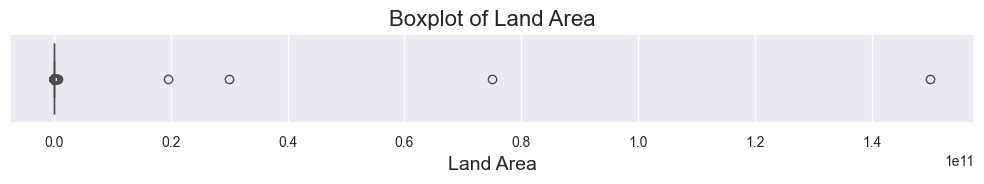

In [84]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['land_area'])
plt.title('Boxplot of Land Area')
plt.xlabel('Land Area')
plt.tight_layout()
plt.show()

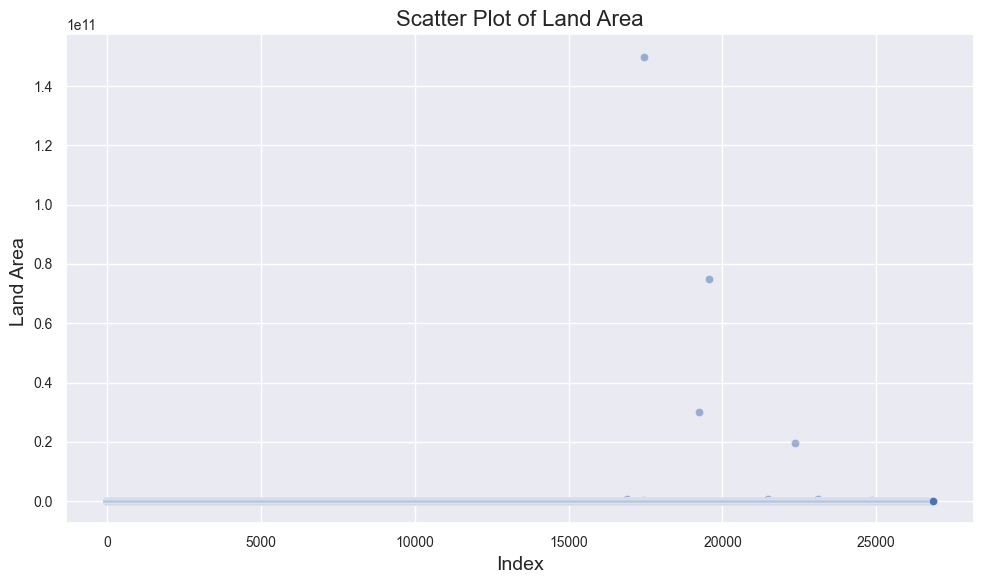

In [85]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df.index, y='land_area', alpha=0.5)
plt.title('Scatter Plot of Land Area')
plt.xlabel('Index')
plt.ylabel('Land Area ')
plt.grid(True)
plt.tight_layout()
plt.show()

In [86]:
df['log_land_area'] = np.log(df['land_area'])
df.head()

,date,land_area,price_total,price_per_m2,subdistrict,regency,log_land_area
0,2024-05-19,200.0,8.000000e+08,4000000.0,Nusa Dua,Badung,5.298317
1,2024-03-20,400.0,2.800000e+09,7000000.0,Canggu,Badung,5.991465
2,2024-04-28,300.0,3.000000e+09,10000000.0,Canggu,Badung,5.703782
3,2024-05-19,6300.0,9.450000e+10,15000000.0,Kuta,Badung,8.748305
4,2024-05-19,2000.0,7.900000e+09,3950000.0,Kelating,Tabanan,7.600902


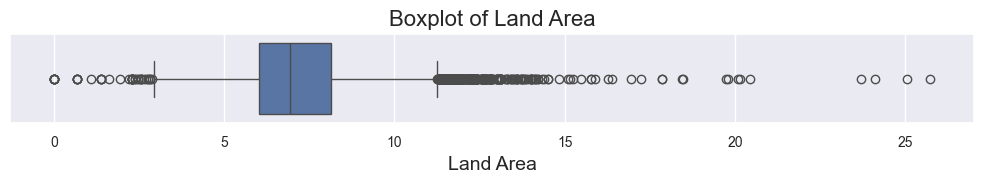

In [87]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['log_land_area'])
plt.title('Boxplot of Land Area')
plt.xlabel('Land Area')
plt.tight_layout()
plt.show()

In [88]:
Q1 = df['log_land_area'].quantile(0.25)
Q3 = df['log_land_area'].quantile(0.75)

# Menghitung Interquartile Range (IQR)
IQR = Q3 - Q1

# Menentukan ambang batas minimum untuk gaji
min_threshold = 0

# Menghitung batas bawah, dan memastikannya tidak negatif
lower_bound = max(Q1 - 1.5 * IQR, min_threshold)

# Menghitung batas atas
upper_bound = Q3 + 1.5 * IQR

print('lower_bound: ',lower_bound)
print('upper_bound: ', upper_bound)

lower_bound:  2.8972630851888512
upper_bound:  11.262651730449992


In [89]:
df = df[(df['log_land_area'] >= lower_bound) & (df['log_land_area'] <= upper_bound)]

- Data After Outlier Handling

In [90]:
df['log_land_area'].describe()

count    25944.000000
mean         7.142170
std          1.467655
min          2.944439
25%          6.021023
50%          6.907755
75%          8.063063
max         11.259323
Name: log_land_area, dtype: float64

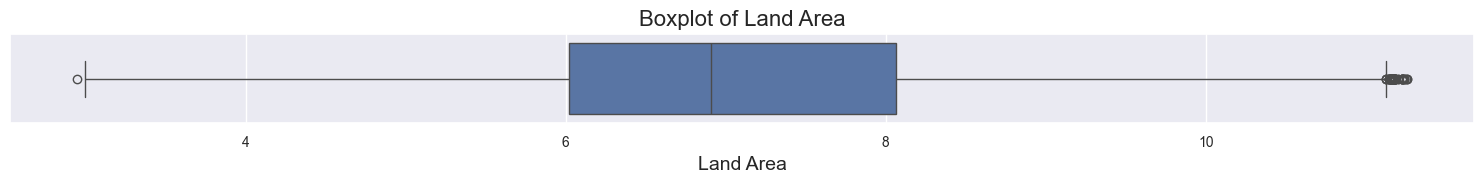

In [91]:
plt.figure(figsize=(15, 2))
sns.boxplot(x=df['log_land_area'])
plt.title('Boxplot of Land Area')
plt.xlabel('Land Area')
plt.tight_layout()
plt.show()

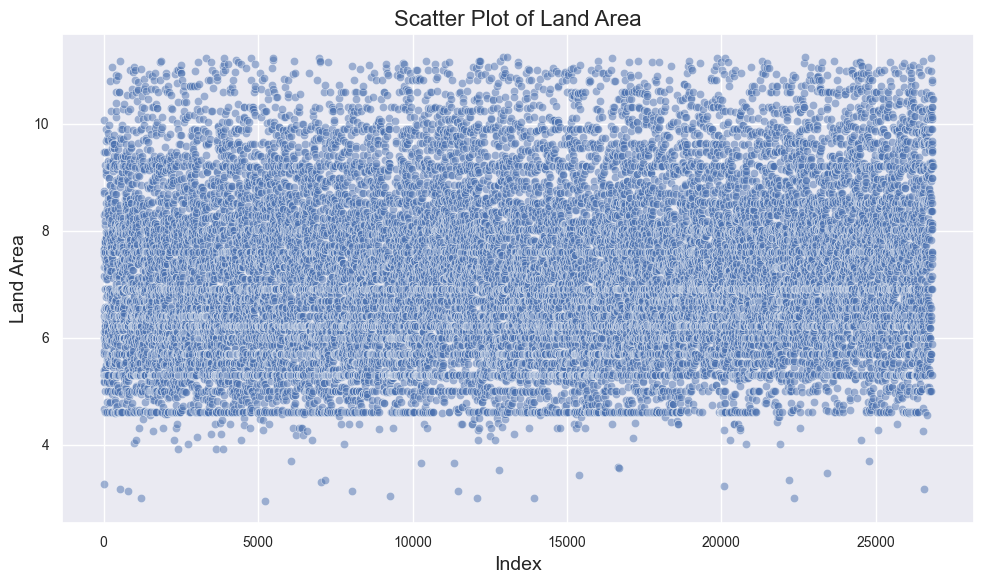

In [92]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df.index, y='log_land_area', alpha=0.5)
plt.title('Scatter Plot of Land Area')
plt.xlabel('Index')
plt.ylabel('Land Area')
plt.grid(True)
plt.tight_layout()
plt.show()

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25944 entries, 0 to 26837
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           25944 non-null  object 
 1   land_area      25944 non-null  float64
 2   price_total    25944 non-null  float64
 3   price_per_m2   25944 non-null  float64
 4   subdistrict    25944 non-null  object 
 5   regency        25944 non-null  object 
 6   log_land_area  25944 non-null  float64
dtypes: float64(4), object(3)
memory usage: 1.6+ MB


#### Outlier Handling of Price Total Column

- Data Before Outlier Handling

In [94]:
df['price_total'].describe()

count    2.594400e+04
mean     2.386310e+11
std      3.449009e+12
min      0.000000e+00
25%      2.635000e+09
50%      7.300000e+09
75%      2.209900e+10
max      5.000000e+14
Name: price_total, dtype: float64

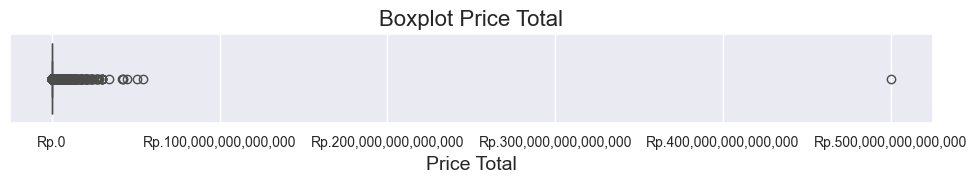

In [95]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['price_total'])
plt.title('Boxplot Price Total')
plt.xlabel('Price Total')
plt.gca().xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

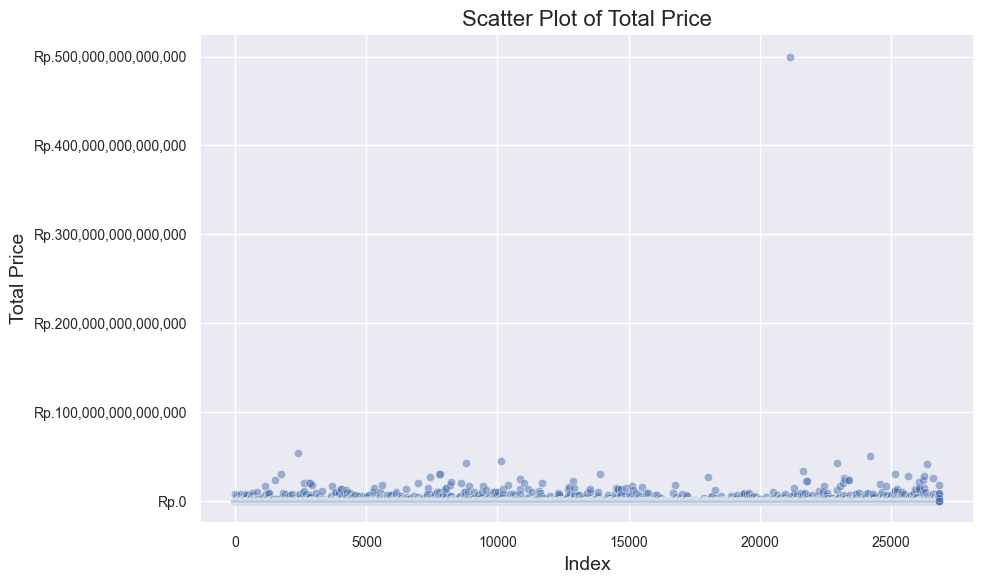

In [96]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df.index, y='price_total', alpha=0.5)
plt.title('Scatter Plot of Total Price')
plt.xlabel('Index')
plt.ylabel('Total Price')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

In [97]:
df['log_price_total'] = np.log(df['price_total'])
df.head()

c:\Users\Wahpram\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,date,land_area,price_total,price_per_m2,subdistrict,regency,log_land_area,log_price_total
0,2024-05-19,200.0,8.000000e+08,4000000.0,Nusa Dua,Badung,5.298317,20.500122
1,2024-03-20,400.0,2.800000e+09,7000000.0,Canggu,Badung,5.991465,21.752885
2,2024-04-28,300.0,3.000000e+09,10000000.0,Canggu,Badung,5.703782,21.821878
3,2024-05-19,6300.0,9.450000e+10,15000000.0,Kuta,Badung,8.748305,25.271866
4,2024-05-19,2000.0,7.900000e+09,3950000.0,Kelating,Tabanan,7.600902,22.790129


In [98]:
Q1 = df['log_price_total'].quantile(0.25)
Q3 = df['log_price_total'].quantile(0.75)

# Menghitung Interquartile Range (IQR)
IQR = Q3 - Q1

# Menentukan ambang batas minimum untuk gaji
min_threshold = 0

# Menghitung batas bawah, dan memastikannya tidak negatif
lower_bound = max(Q1 - 1.5 * IQR, min_threshold)

# Menghitung batas atas
upper_bound = Q3 + 1.5 * IQR

print('lower_bound: ',lower_bound)
print('upper_bound: ', upper_bound)

lower_bound:  18.502175253982976
upper_bound:  27.00877196053434


In [99]:
df = df[(df['log_price_total'] >= lower_bound) & (df['log_price_total'] <= upper_bound)]

- Data After Outlier Handling

In [100]:
df['log_price_total'].describe()

count    24541.000000
mean        22.696997
std          1.508272
min         18.515991
25%         21.639557
50%         22.627237
75%         23.624687
max         27.006467
Name: log_price_total, dtype: float64

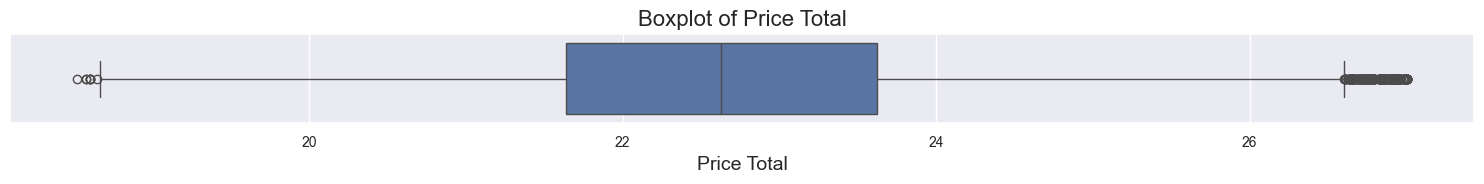

In [103]:
plt.figure(figsize=(15, 2))
sns.boxplot(x=df['log_price_total'])
plt.title('Boxplot of Price Total')
plt.xlabel('Price Total')
plt.tight_layout()
plt.show()

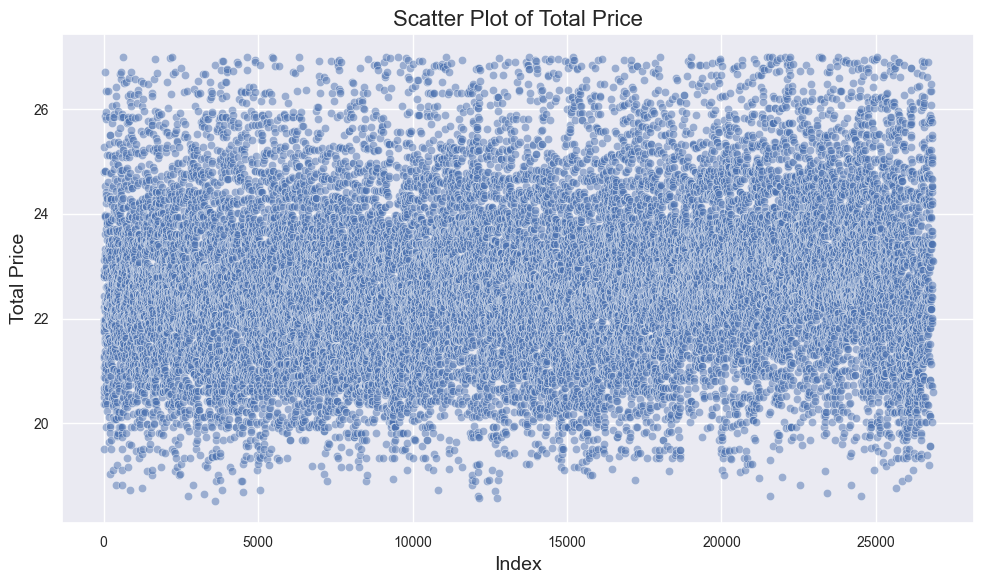

In [104]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df.index, y='log_price_total', alpha=0.5)
plt.title('Scatter Plot of Total Price')
plt.xlabel('Index')
plt.ylabel('Total Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24541 entries, 0 to 26835
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             24541 non-null  object 
 1   land_area        24541 non-null  float64
 2   price_total      24541 non-null  float64
 3   price_per_m2     24541 non-null  float64
 4   subdistrict      24541 non-null  object 
 5   regency          24541 non-null  object 
 6   log_land_area    24541 non-null  float64
 7   log_price_total  24541 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.7+ MB


### Outlier Handling of Price Per m2

- Data Before Outlier Handling

In [106]:
df['price_per_m2'].describe()

count    2.454100e+04
mean     1.484828e+07
std      6.385654e+07
min      5.988024e+03
25%      3.500000e+06
50%      6.500000e+06
75%      1.200000e+07
max      2.500000e+09
Name: price_per_m2, dtype: float64

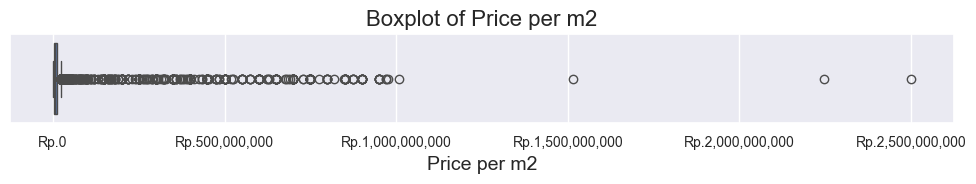

In [107]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['price_per_m2'])
plt.title('Boxplot of Price per m2')
plt.xlabel('Price per m2')
plt.gca().xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

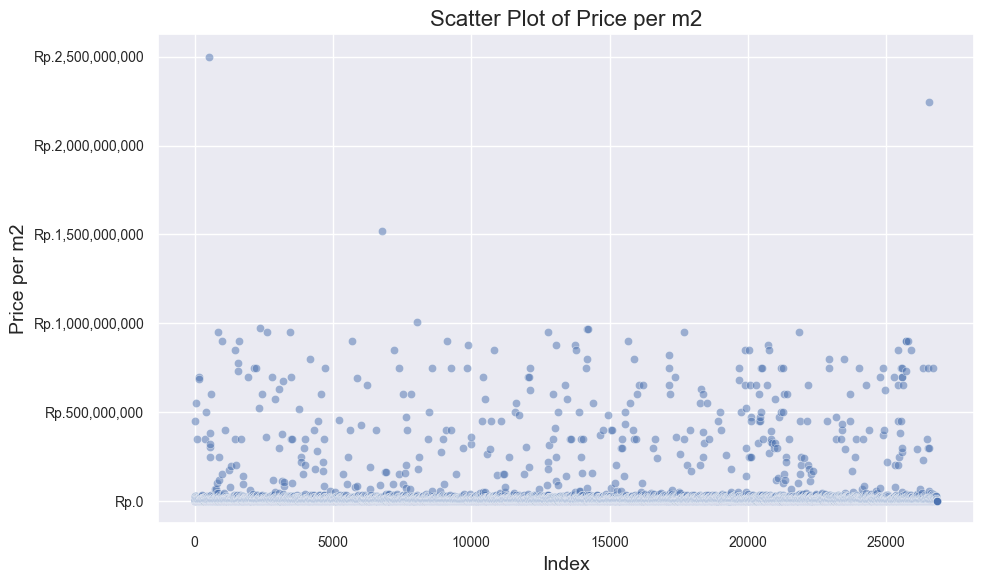

In [108]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df.index, y='price_per_m2', alpha=0.5)
plt.title('Scatter Plot of Price per m2')
plt.xlabel('Index')
plt.ylabel('Price per m2')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

In [109]:
df['log_price_per_m2'] = np.log(df['price_per_m2'])
df.head()

,date,land_area,price_total,price_per_m2,subdistrict,regency,log_land_area,log_price_total,log_price_per_m2
0,2024-05-19,200.0,8.000000e+08,4000000.0,Nusa Dua,Badung,5.298317,20.500122,15.201805
1,2024-03-20,400.0,2.800000e+09,7000000.0,Canggu,Badung,5.991465,21.752885,15.761421
2,2024-04-28,300.0,3.000000e+09,10000000.0,Canggu,Badung,5.703782,21.821878,16.118096
3,2024-05-19,6300.0,9.450000e+10,15000000.0,Kuta,Badung,8.748305,25.271866,16.523561
4,2024-05-19,2000.0,7.900000e+09,3950000.0,Kelating,Tabanan,7.600902,22.790129,15.189226


In [110]:
Q1 = df['log_price_per_m2'].quantile(0.25)
Q3 = df['log_price_per_m2'].quantile(0.75)

# Menghitung Interquartile Range (IQR)
IQR = Q3 - Q1

# Menentukan ambang batas minimum untuk gaji
min_threshold = 0

# Menghitung batas bawah, dan memastikannya tidak negatif
lower_bound = max(Q1 - 1.5 * IQR, min_threshold)

# Menghitung batas atas
upper_bound = Q3 + 1.5 * IQR

print('lower_bound: ',lower_bound)
print('upper_bound: ', upper_bound)

lower_bound:  13.220058004520691
upper_bound:  18.148632729691226


In [111]:
df = df[(df['log_price_per_m2'] >= lower_bound) & (df['log_price_per_m2'] <= upper_bound)]

In [112]:
df['log_price_per_m2'].describe()

count    23640.000000
mean        15.661400
std          0.826655
min         13.220803
25%         15.136313
50%         15.687313
75%         16.300417
max         18.132999
Name: log_price_per_m2, dtype: float64

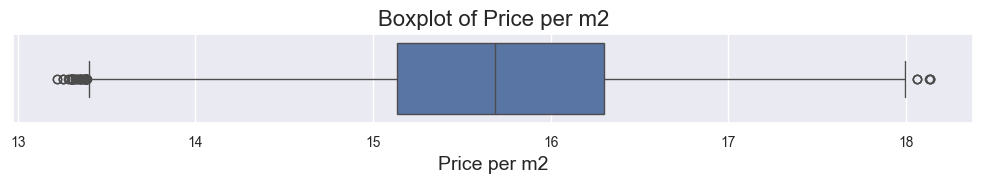

In [116]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['log_price_per_m2'])
plt.title('Boxplot of Price per m2')
plt.xlabel('Price per m2')
plt.tight_layout()
plt.show()

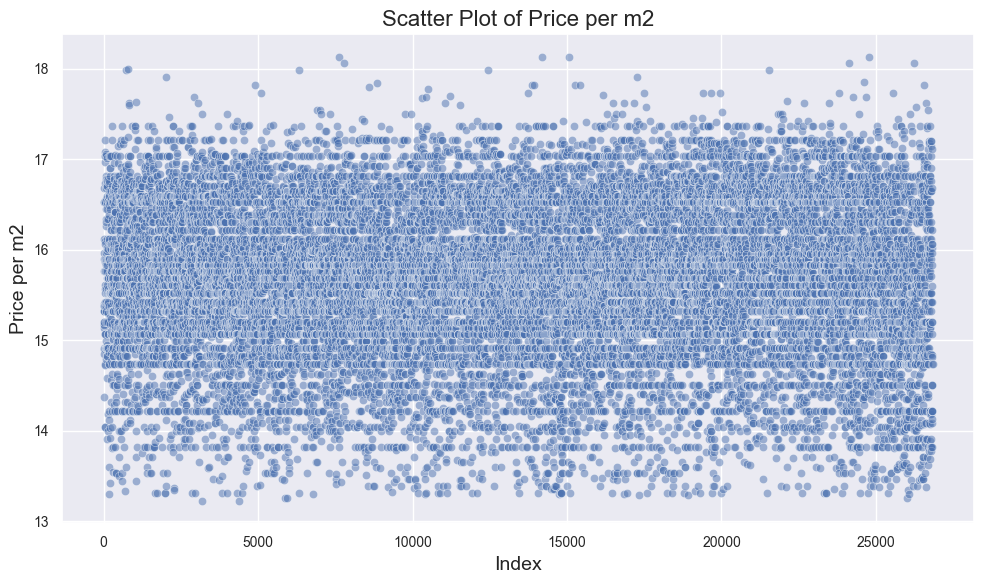

In [117]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df.index, y='log_price_per_m2', alpha=0.5)
plt.title('Scatter Plot of Price per m2')
plt.xlabel('Index')
plt.ylabel('Price per m2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23640 entries, 0 to 26835
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              23640 non-null  object 
 1   land_area         23640 non-null  float64
 2   price_total       23640 non-null  float64
 3   price_per_m2      23640 non-null  float64
 4   subdistrict       23640 non-null  object 
 5   regency           23640 non-null  object 
 6   log_land_area     23640 non-null  float64
 7   log_price_total   23640 non-null  float64
 8   log_price_per_m2  23640 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.8+ MB


In [119]:
df['log_price_per_m2'].describe()

count    23640.000000
mean        15.661400
std          0.826655
min         13.220803
25%         15.136313
50%         15.687313
75%         16.300417
max         18.132999
Name: log_price_per_m2, dtype: float64

In [120]:
df.head()

,date,land_area,price_total,price_per_m2,subdistrict,regency,log_land_area,log_price_total,log_price_per_m2
0,2024-05-19,200.0,8.000000e+08,4000000.0,Nusa Dua,Badung,5.298317,20.500122,15.201805
1,2024-03-20,400.0,2.800000e+09,7000000.0,Canggu,Badung,5.991465,21.752885,15.761421
2,2024-04-28,300.0,3.000000e+09,10000000.0,Canggu,Badung,5.703782,21.821878,16.118096
3,2024-05-19,6300.0,9.450000e+10,15000000.0,Kuta,Badung,8.748305,25.271866,16.523561
4,2024-05-19,2000.0,7.900000e+09,3950000.0,Kelating,Tabanan,7.600902,22.790129,15.189226


In [72]:
filtered_df = df[(df['log_land_area'] > 0) & (df['log_price_total'] > 0) & (df['price_per_m2'] > 0)]
df = filtered_df

df.head()

,date,land_area,price_total,price_per_m2,subdistrict,regency
0,2024-05-19,200.0,8.000000e+08,4000000.0,Nusa Dua,Badung
1,2024-03-20,400.0,2.800000e+09,7000000.0,Canggu,Badung
2,2024-04-28,300.0,3.000000e+09,10000000.0,Canggu,Badung
4,2024-05-19,2000.0,7.900000e+09,3950000.0,Kelating,Tabanan
5,2024-05-19,2130.0,8.307000e+09,3900000.0,Jimbaran,Badung


# Data Transformation

### Convert Date Column to Datetime Datatype

In [121]:
df['date'] = pd.to_datetime(df['date'])

df_date_conv = df.copy()
df_date_conv.head()

,date,land_area,price_total,price_per_m2,subdistrict,regency,log_land_area,log_price_total,log_price_per_m2
0,2024-05-19,200.0,8.000000e+08,4000000.0,Nusa Dua,Badung,5.298317,20.500122,15.201805
1,2024-03-20,400.0,2.800000e+09,7000000.0,Canggu,Badung,5.991465,21.752885,15.761421
2,2024-04-28,300.0,3.000000e+09,10000000.0,Canggu,Badung,5.703782,21.821878,16.118096
3,2024-05-19,6300.0,9.450000e+10,15000000.0,Kuta,Badung,8.748305,25.271866,16.523561
4,2024-05-19,2000.0,7.900000e+09,3950000.0,Kelating,Tabanan,7.600902,22.790129,15.189226


In [122]:
df_date_conv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23640 entries, 0 to 26835
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              23640 non-null  datetime64[ns]
 1   land_area         23640 non-null  float64       
 2   price_total       23640 non-null  float64       
 3   price_per_m2      23640 non-null  float64       
 4   subdistrict       23640 non-null  object        
 5   regency           23640 non-null  object        
 6   log_land_area     23640 non-null  float64       
 7   log_price_total   23640 non-null  float64       
 8   log_price_per_m2  23640 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 1.8+ MB


- Backup Dataframe

In [123]:
df = df_date_conv.copy()
df.head()

,date,land_area,price_total,price_per_m2,subdistrict,regency,log_land_area,log_price_total,log_price_per_m2
0,2024-05-19,200.0,8.000000e+08,4000000.0,Nusa Dua,Badung,5.298317,20.500122,15.201805
1,2024-03-20,400.0,2.800000e+09,7000000.0,Canggu,Badung,5.991465,21.752885,15.761421
2,2024-04-28,300.0,3.000000e+09,10000000.0,Canggu,Badung,5.703782,21.821878,16.118096
3,2024-05-19,6300.0,9.450000e+10,15000000.0,Kuta,Badung,8.748305,25.271866,16.523561
4,2024-05-19,2000.0,7.900000e+09,3950000.0,Kelating,Tabanan,7.600902,22.790129,15.189226


# Feature Engineering

### Check Dataframe

In [124]:
df.head()

,date,land_area,price_total,price_per_m2,subdistrict,regency,log_land_area,log_price_total,log_price_per_m2
0,2024-05-19,200.0,8.000000e+08,4000000.0,Nusa Dua,Badung,5.298317,20.500122,15.201805
1,2024-03-20,400.0,2.800000e+09,7000000.0,Canggu,Badung,5.991465,21.752885,15.761421
2,2024-04-28,300.0,3.000000e+09,10000000.0,Canggu,Badung,5.703782,21.821878,16.118096
3,2024-05-19,6300.0,9.450000e+10,15000000.0,Kuta,Badung,8.748305,25.271866,16.523561
4,2024-05-19,2000.0,7.900000e+09,3950000.0,Kelating,Tabanan,7.600902,22.790129,15.189226


### Check Land Area Column

In [125]:
df['land_area'].describe()

count    23640.000000
mean      3363.688494
std       7470.241814
min         20.000000
25%        400.000000
50%       1000.000000
75%       2800.000000
max      77000.000000
Name: land_area, dtype: float64

### Make New Feature Based on Land Area

In [126]:
bins = [0, 325, 1640, float('inf')]
labels = ['small', 'medium', 'large']
df['land_area_cat'] = pd.cut(df['land_area'], bins=bins, labels=labels)

df.sort_values(by='land_area', ascending=True)

,date,land_area,price_total,price_per_m2,subdistrict,regency,log_land_area,log_price_total,log_price_per_m2,land_area_cat
13926,2024-01-20,20.0,1.100000e+09,5.500000e+07,Antap,Tabanan,2.995732,20.818576,17.822844,small
778,2024-05-17,23.0,1.500000e+09,6.521739e+07,Pesanggaran,Denpasar,3.135494,21.128731,17.993237,small
20085,2024-03-20,25.0,7.500000e+08,3.000000e+07,Denpasar Timur,Denpasar,3.218876,20.435584,17.216708,small
23407,2024-04-19,32.0,1.280000e+08,4.000000e+06,Kubutambahan,Buleleng,3.465736,18.667541,15.201805,small
12811,2024-01-20,34.0,1.870000e+08,5.500000e+06,Keramas,Gianyar,3.526361,19.046619,15.520259,small
...,...,...,...,...,...,...,...,...,...,...
16469,2023-12-21,75000.0,4.500000e+10,6.000000e+05,Petang,Badung,11.225243,24.529928,13.304685,large
6978,2024-01-20,75500.0,4.907500e+11,6.500000e+06,Nyanyi,Badung,11.231888,26.919201,15.687313,large
5488,2024-04-19,75850.0,5.960000e+10,7.857614e+05,Sukasada,Buleleng,11.236513,24.810921,13.574408,large
19869,2024-03-20,76000.0,1.520000e+11,2.000000e+06,Batuagung,Jembrana,11.238489,25.747146,14.508658,large


# Export Dataframe to MongoDB

- Import Module

In [127]:
from scripts import load_data_to_mongo

- Export Data to MongoDB

In [128]:
data = df.to_dict(orient='index')

In [129]:
load_data_to_mongo.load_to_mongo(data, 'clean_new')

----------------------------------------------
Connected to db
Total documents inserted: 23640
Total documents in collection: 23640
Dissconnected!
